
# <div style="text-align: center;">  Підготовка та аналіз даних  </div> #

# <div style="text-align: center;"> _Лабораторна робота №4, частина 2_ </div> #


## <div style="text-align: right;"> _ФБ-24 Бадрак Іван_ </div> ##





### Спочатку вибираємо відповідний до вимог датасет. Датасет має відповідати таким вимогам:
#### - Data Set Characteristics: Multivariate
#### - Attribute Characteristics: Categorical, Integer, Real
#### - Number of Attributes: at least 2 integers/real
#### - Missing Values? YES!!!!!
### Я вибрав датасет <a href="https://archive.ics.uci.edu/dataset/27/credit+approval"> _Credir Approval_ </a>. Його опис: Dataset Characteristics - Multivariate, Feature Type - Categorical, Integer, Has Missing Values? Yes, Some int.
### Далі розархівовуємо та зчитуємо дані.

In [4]:
import zipfile
import pandas as pd
import os
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display

def extract_zipfile():
    dir = "lab4"
    with zipfile.ZipFile('credit+approval.zip', 'r') as zip_ref:
        zip_ref.extractall(dir)
    print("Успішно розархівовано.")

file_path = "lab4/crx.data"

if os.path.exists(file_path):
    print ('Вже розархівовано')
else:
    extract_zipfile()

def pd_df():
    na_values = ['?']
    columns = [
    'A1', 'A2', 'A3', 'A4', 'A5',
    'A6', 'A7', 'A8', 'A9', 'A10',
    'A11', 'A12', 'A13', 'A14', 'A15',
    'A16'
]
    df = pd.read_csv(file_path, delimiter=',', index_col=False, names=columns, na_values=na_values)
    #print (df.dtypes)

    return df

df = pd_df()
display(df)

Вже розархівовано


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


### 1. Поборотися із зниклими даними.
### Проаналізувавши датасет та методи боротьби зі зниклими даними, я вирішив видалити рядки зі NaN(Deleting the row with missing data).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


C:\Users\likea\AppData\Local\Temp\ipykernel_15084\1118762885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upd_df.dropna(axis=1,inplace=True)


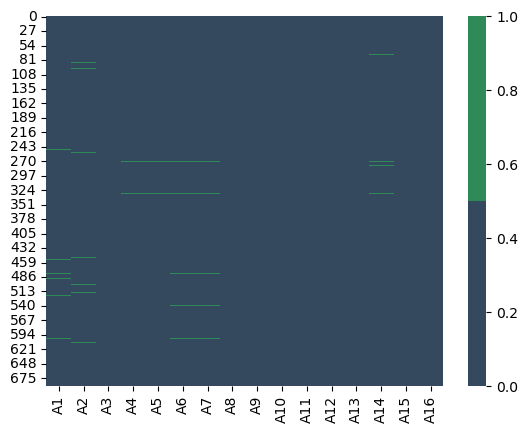

In [5]:

colours = ['#34495E', 'seagreen']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
df.info()
upd_df = df.dropna(axis=0)
upd_df.dropna(axis=1,inplace=True)
#upd_df.info()




### 2. Пронормувати вибраний датасет або стандартизувати його
### Застосовую метод min-max нормалізації. 

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,0.271111,0.000000,u,g,w,v,0.043860,t,t,0.014925,f,g,0.1010,0.00000,+
1,a,0.713016,0.159286,u,g,q,h,0.106667,t,t,0.089552,f,g,0.0215,0.00560,+
2,a,0.170635,0.017857,u,g,q,h,0.052632,t,f,0.000000,f,g,0.1400,0.00824,+
3,b,0.223492,0.055000,u,g,w,v,0.131579,t,t,0.074627,t,g,0.0500,0.00003,+
4,b,0.101905,0.200893,u,g,w,v,0.060000,t,f,0.000000,f,s,0.0600,0.00000,+


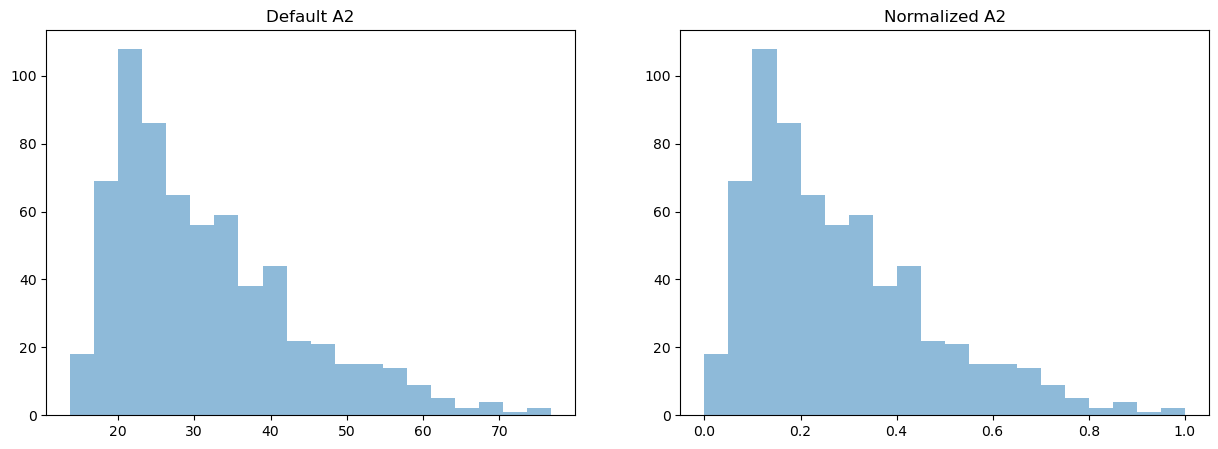

In [6]:
import matplotlib.pyplot as plt 
#df.plot(kind = 'bar')

normalized_df = upd_df.copy()

min_values = upd_df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']].min()
max_values = upd_df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']].max()

normalized_columns = (upd_df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']] - min_values) / (max_values - min_values)
normalized_df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']] = normalized_columns[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']]

display(normalized_df.head())
#normalized_df.plot(kind = 'bar')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(upd_df['A2'], bins=20, alpha=0.5)
plt.title('Default A2')

plt.subplot(1, 2, 2)
plt.hist(normalized_df['A2'], bins=20, alpha=0.5)
plt.title('Normalized A2')

plt.show()


### 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

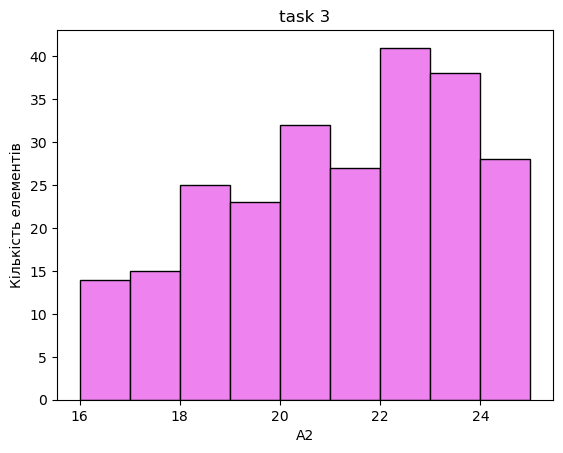

In [7]:
start = 16
step = 1
ranges = list(range(start, start + step * 10 , step))
plt.hist(upd_df['A2'], bins=ranges, edgecolor='black', color='violet')
plt.xlabel("A2")
plt.ylabel('Кількість елементів')
plt.title('task 3')
plt.show()

### 4. Збудувати графік залежності одного integer/real атрибута від іншого.

d:\anaconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


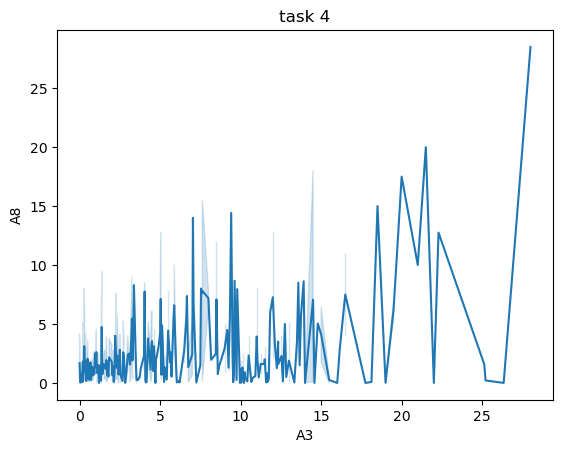

In [8]:

sns.lineplot(x='A3', y='A8', data=upd_df)
plt.xlabel('A3')
plt.ylabel('A8')
plt.title('task 4')
plt.show()


### 5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.
#### Якщо коротко, то коефіцієнт Пірсона відображає силу лінійної залежності між змінними, а коефіцієнт Спірмена - оцінює наскільки добре можна описати відношення між двома змінними за допомогою монотонної функції.

In [9]:
atr1 = upd_df['A2']
atr2 = upd_df['A8']

pearson_co, _ = sp.stats.pearsonr(atr1, atr2)
print ('Коефіцієнт Пірсона: ', pearson_co)

spearman_co, _ = sp.stats.spearmanr(atr1, atr2)
print ('Коефіцієнт Спірмена: ', spearman_co)

Коефіцієнт Пірсона:  0.4176467235744198
Коефіцієнт Спірмена:  0.2790577204576333


### 6. Провести One Hot Encoding категоріального string атрибуту.

In [10]:
import sklearn
encoded_df = upd_df.copy()
encoder = OneHotEncoder(sparse=False)
encoded_column = encoder.fit_transform(upd_df[['A1']])
encoded_data = pd.DataFrame(encoded_column, columns=encoder.get_feature_names(['A1']))

encoded_df = pd.concat([upd_df, encoded_data], axis=1)

display(encoded_df.head(100))

d:\anaconda3\envs\env\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A1_a,A1_b
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1.0,f,g,202.0,0.0,+,0.0,1.0
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6.0,f,g,43.0,560.0,+,1.0,0.0
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0.0,f,g,280.0,824.0,+,1.0,0.0
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5.0,t,g,100.0,3.0,+,0.0,1.0
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0.0,f,s,120.0,0.0,+,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,b,37.50,1.750,y,p,c,bb,0.250,t,f,0.0,t,g,164.0,400.0,-,0.0,1.0
101,b,35.25,16.500,y,p,c,v,4.000,t,f,0.0,f,g,80.0,0.0,-,0.0,1.0
102,b,18.67,5.000,u,g,q,v,0.375,t,t,2.0,f,g,0.0,38.0,-,1.0,0.0
103,b,25.00,12.000,u,g,k,v,2.250,t,t,2.0,t,g,120.0,5.0,-,0.0,1.0


### 7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі

d:\anaconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

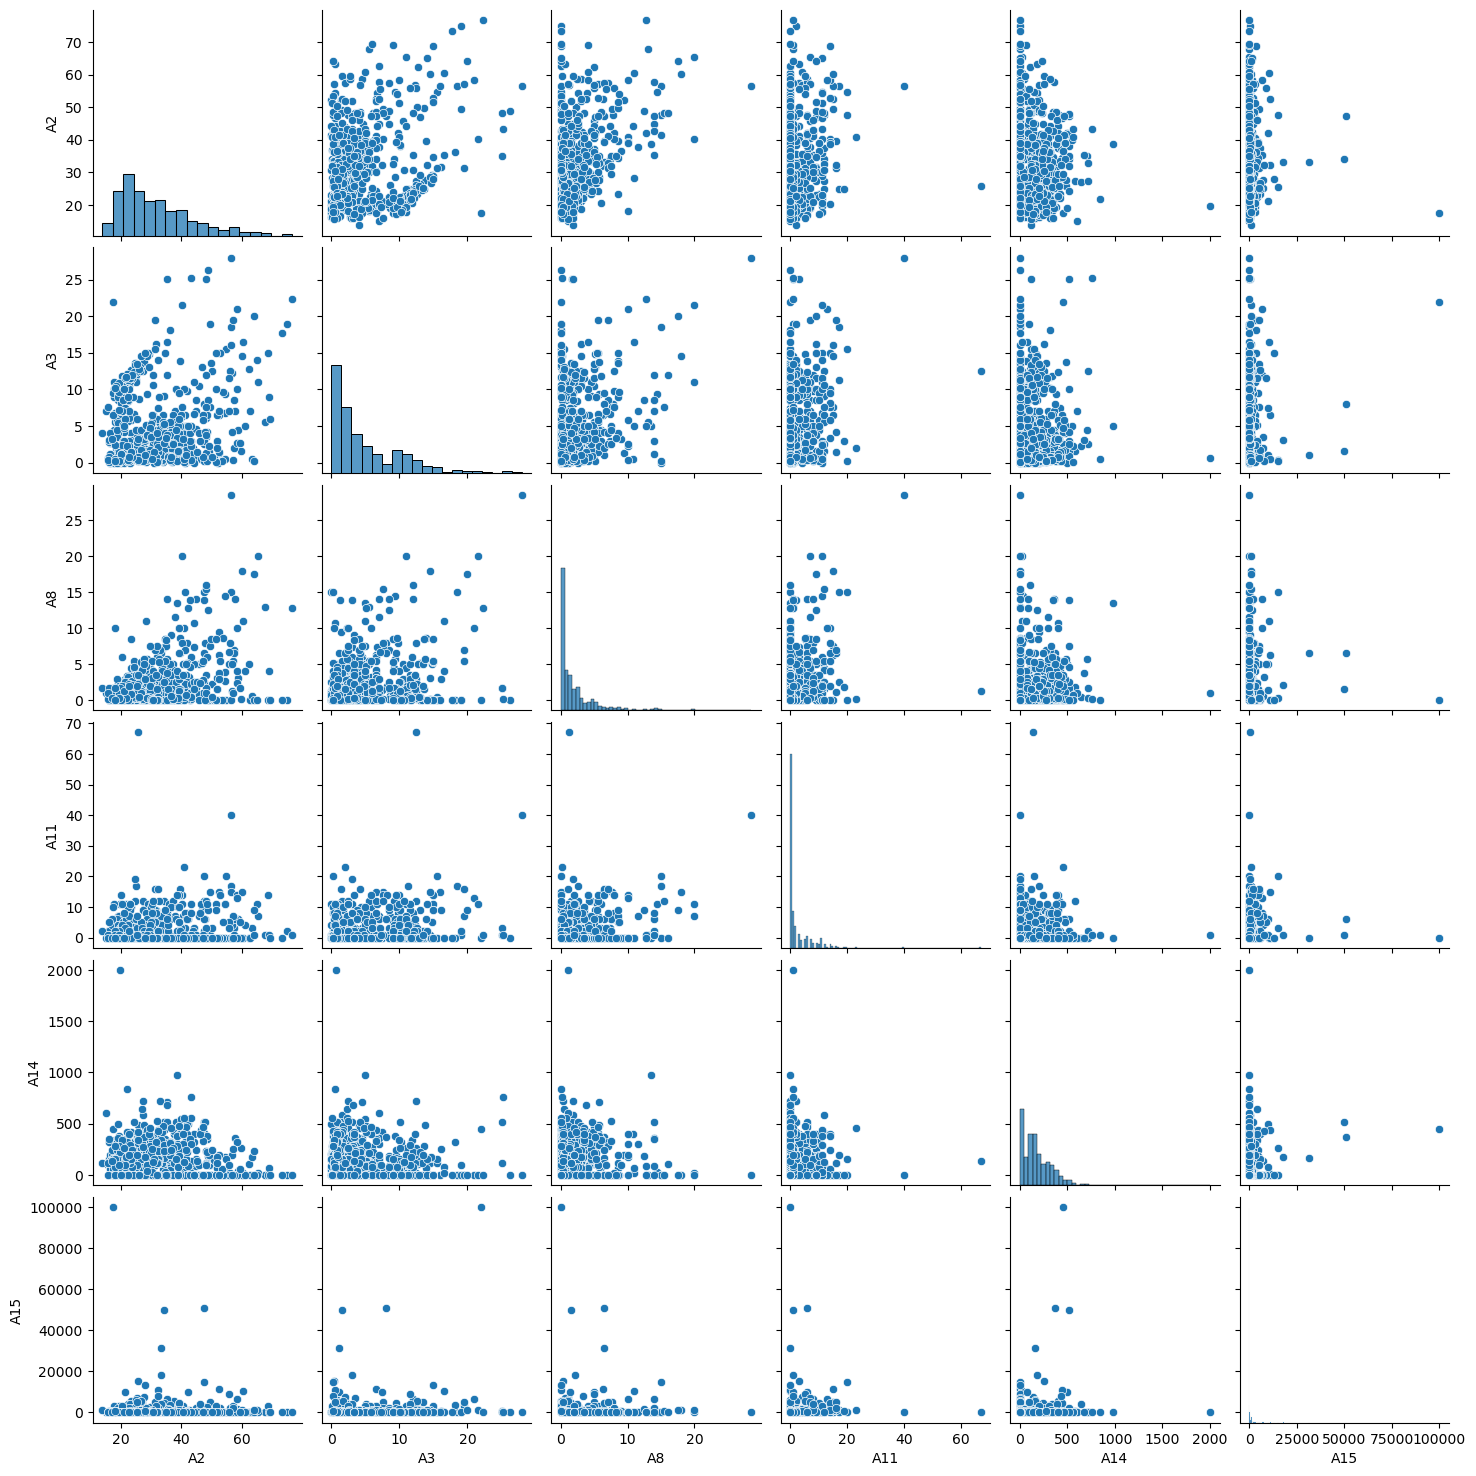

In [11]:
sns.pairplot(upd_df)
plt.show()